In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date

In [2]:
#import dataset
with pd.ExcelFile(r'C:\Users\Victordanok\Desktop\Projects\KPMG\KPMG_VI_New_raw_data_update_final.xlsx') as reader:
    ncl = pd.read_excel(reader, sheet_name = 'NewCustomerList', header = 1)
    

In [3]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [4]:
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.10,1.3750,1.71875,1.460938,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.99,0.9900,1.23750,1.051875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.64,0.6400,0.64000,0.640000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.95,1.1875,1.18750,1.187500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.76,0.7600,0.95000,0.950000,4,4,1.703125


In [5]:
ncl.duplicated().sum()

0

In [6]:
ncl.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [7]:
ncl.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             187
Unnamed: 19                             324
Unnamed: 20                             324
Rank                                    324
Value                           

In [8]:
#doing and adding an age column

import datetime as dt
today = dt.datetime.today().year
ncl['age'] = today - ncl.DOB.dt.year

In [9]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [10]:
ncl.drop(['DOB', 'first_name', 'last_name', 'country', 'postcode'], axis =1, inplace = True)

In [11]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1000 non-null   object 
 1   past_3_years_bike_related_purchases  1000 non-null   int64  
 2   job_title                            894 non-null    object 
 3   job_industry_category                835 non-null    object 
 4   wealth_segment                       1000 non-null   object 
 5   deceased_indicator                   1000 non-null   object 
 6   owns_car                             1000 non-null   object 
 7   tenure                               1000 non-null   int64  
 8   address                              1000 non-null   object 
 9   state                                1000 non-null   object 
 10  property_valuation                   1000 non-null   int64  
 11  Unnamed: 16                    

In [12]:
ncl.deceased_indicator.value_counts()

N    1000
Name: deceased_indicator, dtype: int64

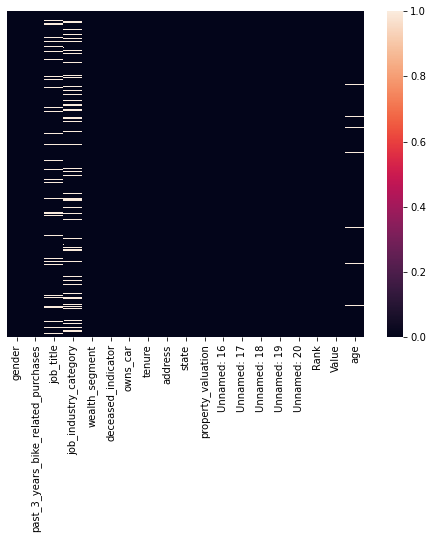

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(ncl.isna(), yticklabels = False)

In [14]:
ncl.drop(['job_title', 'job_industry_category', 'deceased_indicator', 'address'], axis = 1, inplace = True)

In [15]:
ncl.nunique()

gender                                   3
past_3_years_bike_related_purchases    100
wealth_segment                           3
owns_car                                 2
tenure                                  23
state                                    3
property_valuation                      12
Unnamed: 16                             71
Unnamed: 17                            132
Unnamed: 18                            187
Unnamed: 19                            324
Unnamed: 20                            324
Rank                                   324
Value                                  324
age                                     65
dtype: int64

In [16]:
ncl.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

In [17]:
ncl.gender.replace(to_replace = ['U'],value = ['Male'], inplace = True)

In [18]:
ncl.gender.unique()

array(['Male', 'Female'], dtype=object)

In [19]:
print('Mean age of the dataset:{} '.format(ncl.age.mean()))
print('Modal age of the dataset:{} '.format(ncl.age.mode()))

Mean age of the dataset:50.20651068158698 
Modal age of the dataset:0    47.0
dtype: float64 


In [20]:
ncl.fillna(ncl.age.mode()[0], inplace = True)

In [21]:
ncl.isna().sum()

gender                                 0
past_3_years_bike_related_purchases    0
wealth_segment                         0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
Unnamed: 16                            0
Unnamed: 17                            0
Unnamed: 18                            0
Unnamed: 19                            0
Unnamed: 20                            0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

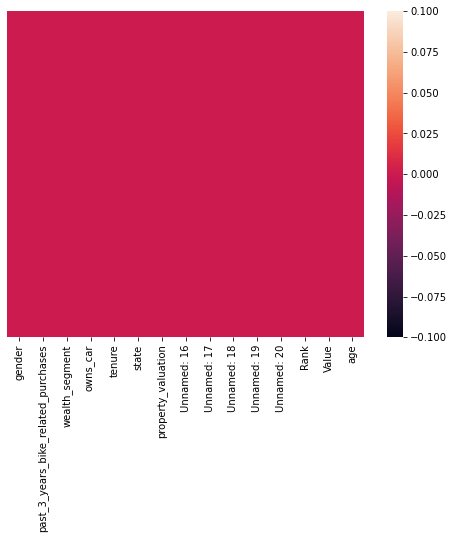

In [22]:
plt.figure(figsize = (8,6))
sns.heatmap(ncl.isna(), yticklabels = False)

In [23]:
ncl.to_csv('newcustomersclean.csv')

## Encoding the data

In [24]:
ncl.nunique()

gender                                   2
past_3_years_bike_related_purchases    100
wealth_segment                           3
owns_car                                 2
tenure                                  23
state                                    3
property_valuation                      12
Unnamed: 16                             71
Unnamed: 17                            132
Unnamed: 18                            187
Unnamed: 19                            324
Unnamed: 20                            324
Rank                                   324
Value                                  324
age                                     65
dtype: int64

In [25]:
ncl.owns_car.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
ncl.tenure.unique()

array([14, 16, 10,  5, 19, 22,  8, 17,  3,  9,  4, 11, 12, 13,  7, 20, 15,
        6, 18, 21,  2,  1,  0], dtype=int64)

In [27]:
ncl.owns_car.replace(to_replace = ['Yes'],value = [1], inplace = True)
ncl.owns_car.replace(to_replace = ['No'],value = [0], inplace = True)

In [28]:
wealth = pd.get_dummies(ncl.wealth_segment)
gender = pd.get_dummies(ncl.gender)
state = pd.get_dummies(ncl.state)

In [29]:
ncl.drop(['wealth_segment', 'gender', 'state'], axis = 1, inplace =True)

In [30]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   past_3_years_bike_related_purchases  1000 non-null   int64  
 1   owns_car                             1000 non-null   int64  
 2   tenure                               1000 non-null   int64  
 3   property_valuation                   1000 non-null   int64  
 4   Unnamed: 16                          1000 non-null   float64
 5   Unnamed: 17                          1000 non-null   float64
 6   Unnamed: 18                          1000 non-null   float64
 7   Unnamed: 19                          1000 non-null   float64
 8   Unnamed: 20                          1000 non-null   int64  
 9   Rank                                 1000 non-null   int64  
 10  Value                                1000 non-null   float64
 11  age                            

In [31]:
ncl = pd.concat([ncl, wealth, gender, state], axis = 1)

In [32]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   past_3_years_bike_related_purchases  1000 non-null   int64  
 1   owns_car                             1000 non-null   int64  
 2   tenure                               1000 non-null   int64  
 3   property_valuation                   1000 non-null   int64  
 4   Unnamed: 16                          1000 non-null   float64
 5   Unnamed: 17                          1000 non-null   float64
 6   Unnamed: 18                          1000 non-null   float64
 7   Unnamed: 19                          1000 non-null   float64
 8   Unnamed: 20                          1000 non-null   int64  
 9   Rank                                 1000 non-null   int64  
 10  Value                                1000 non-null   float64
 11  age                            

In [ ]:
ncl.to_csv('newcustomerslistencoded.csv')